In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [3]:
furniture = pd.read_csv('Superstore.csv')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
furniture.shape

(9994, 21)

In [5]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
        'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
# furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
furniture.head()

,Order Date,Sales
0,2016-11-08T00:00:00Z,261.9600
1,2016-11-08T00:00:00Z,731.9400
2,2016-06-12T00:00:00Z,14.6200
3,2015-10-11T00:00:00Z,957.5775
4,2015-10-11T00:00:00Z,22.3680


In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
furniture.head()

,Order Date,Sales
0,2014-01-03T00:00:00Z,16.448
1,2014-01-04T00:00:00Z,288.060
2,2014-01-05T00:00:00Z,19.536
3,2014-01-06T00:00:00Z,4407.100
4,2014-01-07T00:00:00Z,87.158


In [11]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-03 00:00:00+00:00', '2014-01-04 00:00:00+00:00',
               '2014-01-05 00:00:00+00:00', '2014-01-06 00:00:00+00:00',
               '2014-01-07 00:00:00+00:00', '2014-01-09 00:00:00+00:00',
               '2014-01-10 00:00:00+00:00', '2014-01-11 00:00:00+00:00',
               '2014-01-13 00:00:00+00:00', '2014-01-14 00:00:00+00:00',
               ...
               '2017-12-21 00:00:00+00:00', '2017-12-22 00:00:00+00:00',
               '2017-12-23 00:00:00+00:00', '2017-12-24 00:00:00+00:00',
               '2017-12-25 00:00:00+00:00', '2017-12-26 00:00:00+00:00',
               '2017-12-27 00:00:00+00:00', '2017-12-28 00:00:00+00:00',
               '2017-12-29 00:00:00+00:00', '2017-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Order Date', length=1237, freq=None)

In [47]:
sum([1,2,3,4,5])

15

In [52]:
l = []
for i in furniture.head(22)['Sales']:
    l.append(i)


In [54]:
sum(l)/len(l)

647.1315909090907

In [13]:
y = furniture['Sales'].resample('M').mean()

In [29]:
y

Order Date
2014-01-31 00:00:00+00:00     647.131591
2014-02-28 00:00:00+00:00     225.994600
2014-03-31 00:00:00+00:00    2320.458708
2014-04-30 00:00:00+00:00    1178.972708
2014-05-31 00:00:00+00:00     844.581679
2014-06-30 00:00:00+00:00    1383.805104
2014-07-31 00:00:00+00:00    1414.433042
2014-08-31 00:00:00+00:00    1162.894521
2014-09-30 00:00:00+00:00    2920.619671
2014-10-31 00:00:00+00:00    1084.599759
2014-11-30 00:00:00+00:00    2711.335059
2014-12-31 00:00:00+00:00    2483.772161
2015-01-31 00:00:00+00:00    1009.670867
2015-02-28 00:00:00+00:00     703.024176
2015-03-31 00:00:00+00:00    1489.471231
2015-04-30 00:00:00+00:00    1367.808340
2015-05-31 00:00:00+00:00    1115.988389
2015-06-30 00:00:00+00:00    1127.149636
2015-07-31 00:00:00+00:00    1198.555208
2015-08-31 00:00:00+00:00    1677.196918
2015-09-30 00:00:00+00:00    2583.836720
2015-10-31 00:00:00+00:00    1207.881673
2015-11-30 00:00:00+00:00    2713.305839
2015-12-31 00:00:00+00:00    2497.317373
2016-

In [14]:
y[:13].sum()/12

1615.6891223915075

In [15]:
727/2

363.5

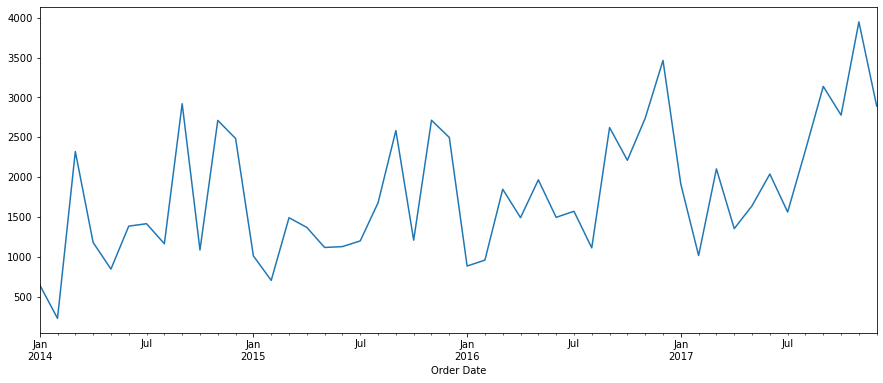

In [16]:
#plot graph
y.plot(figsize=(15, 6))
plt.show()

In [17]:
# Determining Rolling Statistics -- Moving average technique
rollmean = y.rolling(window=12).mean()
rollstd = y.rolling(window=12).std()
print(rollmean, rollstd)

Order Date
2014-01-31 00:00:00+00:00            NaN
2014-02-28 00:00:00+00:00            NaN
2014-03-31 00:00:00+00:00            NaN
2014-04-30 00:00:00+00:00            NaN
2014-05-31 00:00:00+00:00            NaN
2014-06-30 00:00:00+00:00            NaN
2014-07-31 00:00:00+00:00            NaN
2014-08-31 00:00:00+00:00            NaN
2014-09-30 00:00:00+00:00            NaN
2014-10-31 00:00:00+00:00            NaN
2014-11-30 00:00:00+00:00            NaN
2014-12-31 00:00:00+00:00    1531.549884
2015-01-31 00:00:00+00:00    1561.761490
2015-02-28 00:00:00+00:00    1601.513955
2015-03-31 00:00:00+00:00    1532.264998
2015-04-30 00:00:00+00:00    1548.001301
2015-05-31 00:00:00+00:00    1570.618527
2015-06-30 00:00:00+00:00    1549.230571
2015-07-31 00:00:00+00:00    1531.240751
2015-08-31 00:00:00+00:00    1574.099285
2015-09-30 00:00:00+00:00    1546.034039
2015-10-31 00:00:00+00:00    1556.307532
2015-11-30 00:00:00+00:00    1556.471763
2015-12-31 00:00:00+00:00    1557.600531
2016-

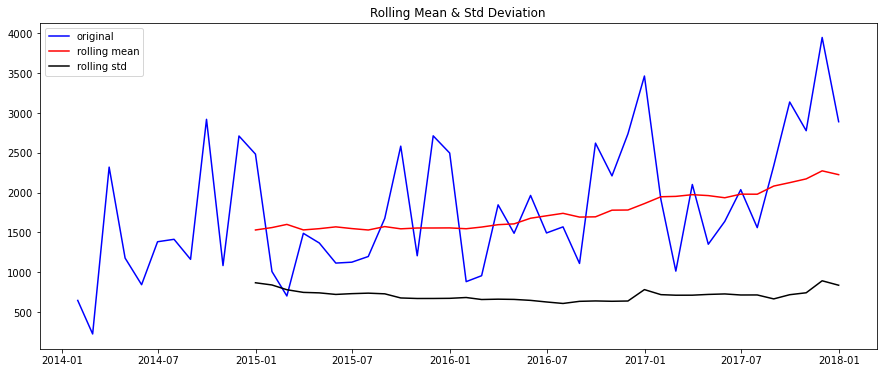

In [18]:
#plot Rolling Statistics
plt.figure(figsize=(15,6))
orig = plt.plot(y, color='blue', label='original' )
mean = plt.plot(rollmean, color='red', label='rolling mean' )
std = plt.plot(rollstd, color='black', label='rolling std' )
plt.legend()
plt.title('Rolling Mean & Std Deviation')
plt.show()

In [ ]:
l = [16.448
288.060
19.536
4407.100
87.158
2014-01-09 00:00:00+00:00	40.544
2014-01-10 00:00:00+00:00	54.830
2014-01-11 00:00:00+00:00	9.940
2014-01-13 00:00:00+00:00	3553.795
2014-01-14 00:00:00+00:00	61.960
2014-01-15 00:00:00+00:00	149.950
2014-01-16 00:00:00+00:00	299.964
2014-01-18 00:00:00+00:00	64.864
2014-01-19 00:00:00+00:00	378.594
2014-01-20 00:00:00+00:00	2673.870
2014-01-21 00:00:00+00:00	25.248
2014-01-23 00:00:00+00:00	46.020
2014-01-26 00:00:00+00:00	1097.250
2014-01-27 00:00:00+00:00	426.670
2014-01-28 00:00:00+00:00	3.928
2014-01-30 00:00:00+00:00	240.500
2014-01-31 00:00:00+00:00	290.666]

In [20]:
#Perform Augumented Dickey-Fuller test

#H0 = Data is not stationary
#H1 = Data is stationary

from statsmodels.tsa.stattools import adfuller
print('Result :')
dftest = adfuller(furniture['Sales'], autolag = 'AIC')
dftest

Result :


(-5.83952059826024,
 3.806330373332019e-07,
 14,
 1222,
 {'1%': -3.435712593855191,
  '5%': -2.863908078253003,
  '10%': -2.5680308008925294},
 22204.428579474043)

In [21]:
dfoutput = pd.Series(dftest[0:3], 
                     index = ['Test Statisctics', 'p-values', 'lags used'])
for key, value in dftest[4].items():
    dfoutput[key] = value
print(dfoutput)

Test Statisctics   -5.839521e+00
p-values            3.806330e-07
lags used           1.400000e+01
1%                 -3.435713e+00
5%                 -2.863908e+00
10%                -2.568031e+00
dtype: float64


In [25]:
y

Order Date
2014-01-31 00:00:00+00:00     647.131591
2014-02-28 00:00:00+00:00     225.994600
2014-03-31 00:00:00+00:00    2320.458708
2014-04-30 00:00:00+00:00    1178.972708
2014-05-31 00:00:00+00:00     844.581679
2014-06-30 00:00:00+00:00    1383.805104
2014-07-31 00:00:00+00:00    1414.433042
2014-08-31 00:00:00+00:00    1162.894521
2014-09-30 00:00:00+00:00    2920.619671
2014-10-31 00:00:00+00:00    1084.599759
2014-11-30 00:00:00+00:00    2711.335059
2014-12-31 00:00:00+00:00    2483.772161
2015-01-31 00:00:00+00:00    1009.670867
2015-02-28 00:00:00+00:00     703.024176
2015-03-31 00:00:00+00:00    1489.471231
2015-04-30 00:00:00+00:00    1367.808340
2015-05-31 00:00:00+00:00    1115.988389
2015-06-30 00:00:00+00:00    1127.149636
2015-07-31 00:00:00+00:00    1198.555208
2015-08-31 00:00:00+00:00    1677.196918
2015-09-30 00:00:00+00:00    2583.836720
2015-10-31 00:00:00+00:00    1207.881673
2015-11-30 00:00:00+00:00    2713.305839
2015-12-31 00:00:00+00:00    2497.317373
2016-

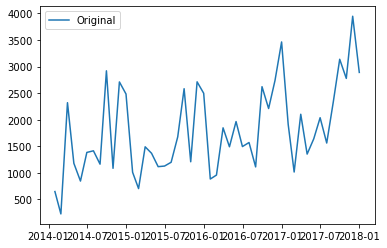

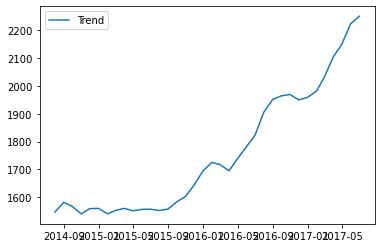

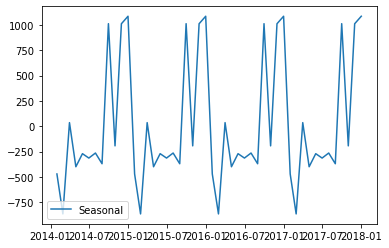

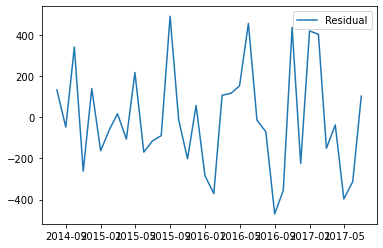

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend()

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend()

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend()

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend()


In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [32]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [33]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [34]:
warnings.filterwarnings("ignore")
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)#..........................?
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, 
                                                 param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1511.6753164041895
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919702
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793645
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1232.136039080031
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280301514
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.925227075813
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2760.8719988299495
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.626138967328
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5687116783373
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2600.6887062243795
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946867
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576523562
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1474.1246433897772
ARIMA(0, 

In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

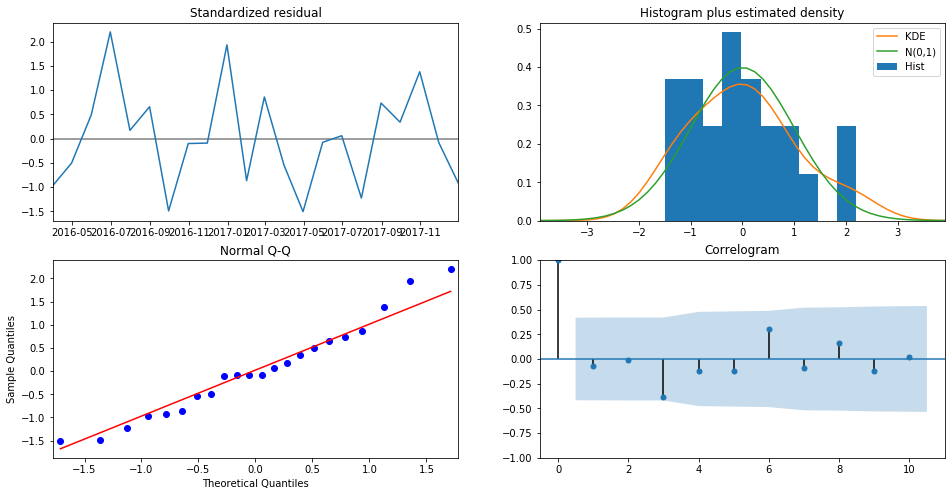

In [36]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [37]:
pred.predicted_mean

NameError: name 'pred' is not defined

In [38]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', 
                         alpha=.9, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.2) #.........?
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

# Q2. Build time series model and check the performance of the model using RMSE


In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'
      .format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


            lower Sales  upper Sales
2018-01-01    66.439602   751.053359
2018-02-01   191.940391   876.931500
2018-03-01   214.443181   899.438819
2018-04-01   127.554349   812.550053
2018-05-01   346.657600  1031.653306
2018-06-01   494.346926  1179.342632
2018-07-01   235.873427   920.869133
2018-08-01   522.882022  1207.877727
2018-09-01   875.774932  1560.770637
2018-10-01   537.150012  1222.145718
2018-11-01   945.782285  1630.777991
2018-12-01   928.336181  1613.331887


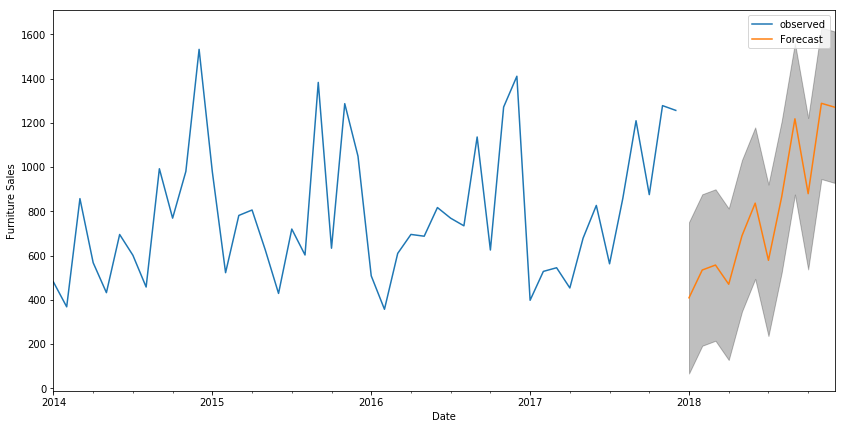

In [31]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()